# 01 - Introduction To Causal Inference



## What is Causal Inference
Causal inference is about figuring out whether one thing actually causes another, not just whether they happen together. eg, if sales go up when we run ads, is it really because of the ads, or just because it was a holiday season? Causal inference gives us tools and frameworks to separate true cause-and-effect relationships from simple correlations.


## Why we Do Causal Inference
 
Because we want to know what really drives an outcome, not just what happens to be related. Eg if company doesn’t just care if ads and sales move together, they want to know if running ads actually causes higher sales. Understanding causality helps them make better decision,and avoid wasting money or effort on things that only look correlated but don’t really make a difference.

## Machine Learning and Causal Inference
 
Machine learning is great at predicting outcomes, while causal inference is about understanding why things happen and what would change if we acted differently.

## Association and Causation
 

In [38]:
import pandas as pd
import numpy as np
from scipy.special import expit
import seaborn as sns
from matplotlib import pyplot as plt
from cycler import cycler



default_cycler = (cycler(color=['0.3', '0.5', '0.7', '0.5']) +
                  cycler(linestyle=['-', '--', ':', '-.']) + 
                  cycler(marker=['o', 'v', 'd', 'p']))

color=['0.3', '0.5', '0.7', '0.5']
linestyle=['-', '--', ':', '-.']
marker=['o', 'v', 'd', 'p']

plt.rc('axes', prop_cycle=default_cycler)
plt.rc('font', size=20)

In [39]:
data = pd.read_csv("./data/xmas_sales.csv")
data.head(6)

,store,weeks_to_xmas,avg_week_sales,is_on_sale,weekly_amount_sold
0,1,3,12.98,1,219.60
1,1,2,12.98,1,184.70
2,1,1,12.98,1,145.75
3,1,0,12.98,0,102.45
4,2,3,19.92,0,103.22
5,2,2,19.92,0,53.73


### The Treatment and the Outcome


### The Fundamental Problem of Causal Inference
 


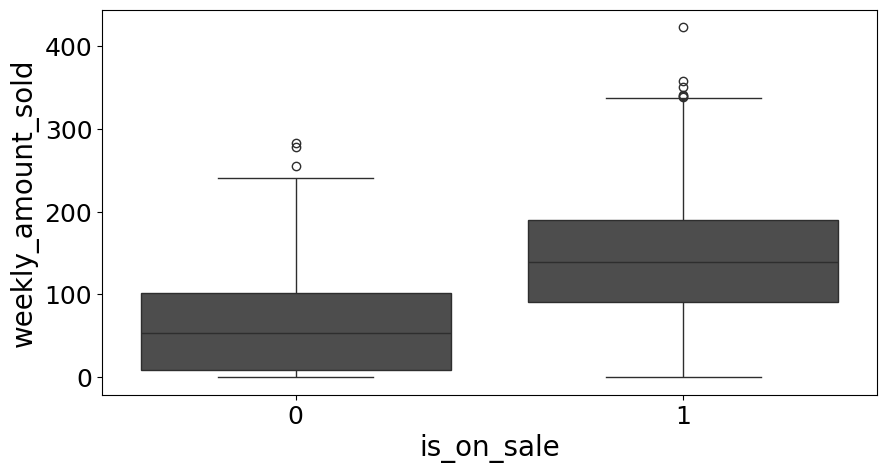

In [42]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.boxplot(y="weekly_amount_sold", x="is_on_sale", data=data, ax=ax)

ax.set_xlabel("is_on_sale", fontsize = 20)
ax.set_ylabel("weekly_amount_sold", fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=18)

### Causal Models
 

### Interventions


### Individual Treatment Effect



### Potential Outcomes
 
### Consistency and Stable Unit Treatment Values


### Causal Quantities of Interest



### Causal Quantities: An Example
 

In [49]:
pd.DataFrame(dict(
    i= [1,2,3,4,5,6],
    y0=[200,120,300, 450,600,600],
    y1=[220,140,400, 500,600,800],
    t= [0,0,0,1,1,1],
    x= [0,0,1,0,0,1],
)).assign(
    y = lambda d: (d["t"]*d["y1"] + (1-d["t"])*d["y0"]).astype(int),
    te=lambda d: d["y1"] - d["y0"]
)

,i,y0,y1,t,x,y,te
0,1,200,220,0,0,200,20
1,2,120,140,0,0,120,20
2,3,300,400,0,1,300,100
3,4,450,500,1,0,500,50
4,5,600,600,1,0,600,0
5,6,600,800,1,1,800,200


In [50]:
pd.DataFrame(dict(
    i= [1,2,3,4,5,6],
    y0=[200,120,300, np.nan, np.nan, np.nan,],
    y1=[np.nan, np.nan, np.nan, 500,600,800],
    t= [0,0,0,1,1,1],
    x= [0,0,1,0,0,1],
)).assign(
    y = lambda d: np.where(d["t"]==1, d["y1"], d["y0"]).astype(int),
    te=lambda d: d["y1"] - d["y0"]
)

,i,y0,y1,t,x,y,te
0,1,200.0,NaN,0,0,200,NaN
1,2,120.0,NaN,0,0,120,NaN
2,3,300.0,NaN,0,1,300,NaN
3,4,NaN,500.0,1,0,500,NaN
4,5,NaN,600.0,1,0,600,NaN
5,6,NaN,800.0,1,1,800,NaN


## Bias
 
### The Bias Equation 


 
### A Visual Guide to Bias
 

<Figure size 640x480 with 0 Axes>

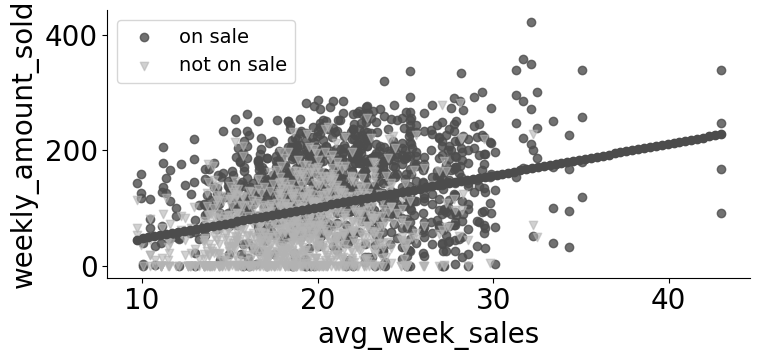

In [53]:
plt.rc('font', size=20)
fig = plt.figure()    

sns.lmplot(data=data,
           ci=None,
           x="avg_week_sales",
           y="weekly_amount_sold",
           scatter=False,
           height=4, aspect=2)

plt.scatter(x=data.query("is_on_sale==1")["avg_week_sales"],
            y=data.query("is_on_sale==1")["weekly_amount_sold"],
            label="on sale",
            color=color[0], alpha=.8, marker=marker[0])

plt.scatter(x=data.query("is_on_sale==0")["avg_week_sales"],
            y=data.query("is_on_sale==0")["weekly_amount_sold"],
            label="not on sale",
            color=color[2], alpha=.6, marker=marker[1])
plt.legend(fontsize="14")
    


## Identifying the Treatment Effect
 
### The Independence Assumption
 

### Identification with Randomization 
 

## Key Ideas
 